In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline
fdir = "D:\\crs\\proj\\2017_Ontario\\2017-07-12_Lake_Bluffs_v3\\"
fname = ("2017-07-12_Lake_Bluff_Crescent_Bar_DEM_5cm.tif")

# read DEM channel 1
with rasterio.open(fdir+fname) as dem:
    z = dem.read(1)
    
print(np.shape(z))


(23600, 33980)


In [2]:
# coordinate reference system
print(dem.crs)
# data transform
print(dem.transform)
# upper left corner
print('upper left: ',dem.transform*(0,0))
# lower right corner
print('lower right: ',dem.transform*(dem.width, dem.height))

# find the array index of a point by inverting the transform (!)
# note order: (easting, northing)
print( ~dem.transform*(341294.0, 4793569.0) )

CRS({'init': 'epsg:26918'})
| 0.05, 0.00, 341294.00|
| 0.00,-0.05, 4793569.00|
| 0.00, 0.00, 1.00|
upper left:  (341294.0, 4793569.0)
lower right:  (342993.0, 4792389.0)
(0.0, 0.0)


In [3]:
# read in the transect points
tfname = '2017-07-12-13_Crescent_Bar_Lake_Bluffs_trans.txt'
column_names = ['id','n','e','elev','lat','lon','label']
import pandas as pd
df=pd.read_csv(fdir+tfname,header = None, names = column_names)
print(df)
print("Read: ",len(df.index),' lines.')

      id             n            e      elev        lat        lon     label
0     11  4.793302e+06  342642.8825  101.9704  43.276098 -76.939247    BLUFF1
1     12  4.793294e+06  342644.3948  102.1922  43.276029 -76.939226    BLUFF2
2     13  4.793292e+06  342631.5170  104.3634  43.276012 -76.939384    BLUFF3
3     14  4.793293e+06  342620.3511  104.9136  43.276020 -76.939522    BLUFF5
4     15  4.793277e+06  342628.2735  104.6322  43.275870 -76.939420    BLUFF6
5     16  4.793272e+06  342609.1304  105.3865  43.275822 -76.939654    BLUFF7
6     17  4.793255e+06  342608.0334  105.9512  43.275673 -76.939663    BLUFF8
7     18  4.793232e+06  342607.9388  106.1509  43.275462 -76.939658    BLUFF9
8     19  4.793233e+06  342598.2427  106.3250  43.275472 -76.939777   BLUFF10
9     20  4.793238e+06  342585.8629  106.0753  43.275516 -76.939931   BLUFF11
10    21  4.793230e+06  342578.3045  106.0633  43.275437 -76.940022   BLUFF12
11    22  4.793211e+06  342585.1251  106.7299  43.275270 -76.939

In [4]:
# TODO - add a bilinear interpolation scheme.
#def bilint(z,en):
    
    


In [5]:
zdem = np.NaN*np.ones(len(df.index))
zdem_minus_meas = np.NaN*np.ones(len(df.index))
for index, row in df.iterrows():
    # print(row["n"], row["e"])
    en = ~dem.transform*(row["e"],row["n"])
    # print( index, en )
    try:
        zdem[index] = z[np.int(en[1]),np.int(en[0])]
    except:
        print("out of bounds for", index, em)
    
    # No data values for DEM are -32767
    if(zdem[index]<-32766.):
        zdem[index]=np.NaN
        
    zdem_minus_meas[index] = zdem[index]-row["elev"]
    print( zdem[index], row["elev"], zdem_minus_meas[index]  )

101.991004944 101.9704 0.0206049438477
102.234153748 102.1922 0.0419537475586
104.365585327 104.3634 0.00218532714844
104.899108887 104.9136 -0.0144911132813
104.626335144 104.6322 -0.00586485595703
105.410202026 105.3865 0.0237020263672
105.983421326 105.9512 0.0322213256836
106.200408936 106.1509 0.0495089355469
106.342674255 106.325 0.0176742553711
106.098907471 106.0753 0.0236074707031
106.053413391 106.0633 -0.00988660888672
106.753456116 106.7299 0.0235561157227
105.683189392 105.6973 -0.0141106079102
104.897331238 104.7722 0.125131237793
105.821250916 105.7807 0.0405509155273
119.130058289 103.633 15.4970582886
103.307060242 103.291 0.0160602416992
104.155677795 103.4857 0.66997779541
103.66734314 103.6935 -0.0261568603516
126.472885132 103.6942 22.7786851318
104.579933167 103.8069 0.773033166504
99.8845214844 99.8079 0.076621484375
95.4723052979 95.4105 0.0618052978516
nan 76.2759 nan
nan 76.328 nan
nan 77.1613 nan
nan 77.2595 nan
nan 77.2948 nan
nan 77.381 nan
nan 77.5142 nan


In [6]:
# add columns to the dataframe
#df.assign(DEM2=pd.Series(zdem,index=df.index))
df['DEM']=pd.Series(zdem,index=df.index)
df['DEM_minus_trans']=pd.Series(zdem_minus_meas,index=df.index)
df

,id,n,e,elev,lat,lon,label,DEM,DEM_minus_trans
0,11,4.793302e+06,342642.8825,101.9704,43.276098,-76.939247,BLUFF1,101.991005,0.020605
1,12,4.793294e+06,342644.3948,102.1922,43.276029,-76.939226,BLUFF2,102.234154,0.041954
2,13,4.793292e+06,342631.5170,104.3634,43.276012,-76.939384,BLUFF3,104.365585,0.002185
3,14,4.793293e+06,342620.3511,104.9136,43.276020,-76.939522,BLUFF5,104.899109,-0.014491
4,15,4.793277e+06,342628.2735,104.6322,43.275870,-76.939420,BLUFF6,104.626335,-0.005865
5,16,4.793272e+06,342609.1304,105.3865,43.275822,-76.939654,BLUFF7,105.410202,0.023702
6,17,4.793255e+06,342608.0334,105.9512,43.275673,-76.939663,BLUFF8,105.983421,0.032221
7,18,4.793232e+06,342607.9388,106.1509,43.275462,-76.939658,BLUFF9,106.200409,0.049509
8,19,4.793233e+06,342598.2427,106.3250,43.275472,-76.939777,BLUFF10,106.342674,0.017674
9,20,4.793238e+06,342585.8629,106.0753,43.275516,-76.939931,BLUFF11,106.098907,0.023607


count    94.000000
mean      1.114097
std       5.021556
min     -11.279250
25%      -0.014396
50%       0.043124
75%       0.346886
max      22.778685
Name: DEM_minus_trans, dtype: float64

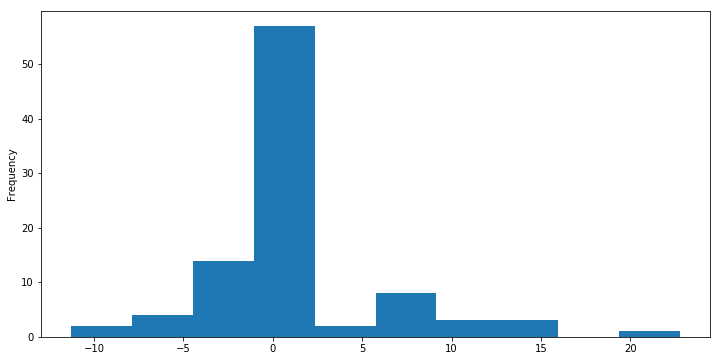

In [17]:
plt.figure(figsize=(12,6))
df['DEM_minus_trans'].plot(kind='hist')
df['DEM_minus_trans'].describe()

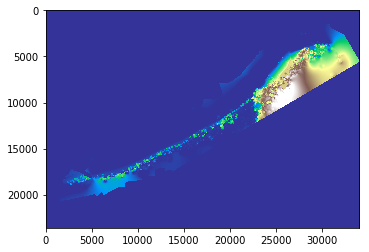

In [8]:
plt.plot(figsize=(12,6));plt.imshow(z[::],cmap=plt.cm.terrain,vmin=75,vmax=130)